In [111]:
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
dataset = pd.read_csv('/content/01-advance.csv')
dataset.head()

Title  \
0  I have been using Advance America for…   
1    I had originally gone to Hoover and…   
2                      Prompt & Courteous   
3  The girls working here were extremely…   
4  I always enjoy going to this location…   

                                             reviews  stars  
0  I have been using Advance America for years. I...      5  
1  I had originally gone to Hoover and Homewood w...      5  
2  I call ahead and talk to the manager Rochelle ...      5  
3  The girls working here were extremely helpful ...      5  
4  I always enjoy going to this location the ladi...      5

In [178]:
dataset.shape


(11536, 3)

In [179]:
dataset.isnull().sum()


Title      0
reviews    0
stars      0
dtype: int64

In [180]:
#Selecting Required Columns:
dataset = dataset[['reviews','stars']]

In [181]:
#Review Ratings Distribution:
data = dataset['stars'].value_counts()


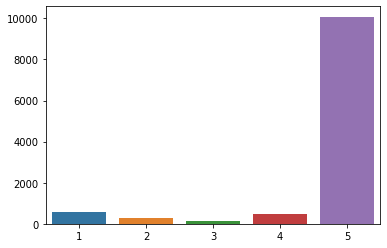

In [182]:
sns.barplot(x=data.index, y=data.values)

In [183]:
text = ""
for i in dataset.reviews:
    text += i
print(text)

I have been using Advance America for years. It is a great Way for me to get those extra things that are needed when a deposit is due For something or unexpected expenses. The website is user-friendly and convenient. I will continue to be a loyal user and I highly recommend this company Or cash advances over others that I have used in the past.I had originally gone to Hoover and Homewood where they both talked to me in smart asked tones and called me rude for asking questions o was trying to figure out. Moe over at Ce terpoint handled my concerns and loan professionally and promptly.I call ahead and talk to the manager Rochelle Haliburton as to what I need to document and update my account. Rochelle is so kind and patient and she was able to update my old account which was at another location in Lexington. Rather than get a cash advance on my VISA Card I choose Advance America.The girls working here were extremely helpful and worked around my personal financial issues to get me approve

In [185]:
from nltk.tokenize import word_tokenize

nltk.download("punkt")
words = word_tokenize(text, language="english")
print(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'have', 'been', 'using', 'Advance', 'America', 'for', 'years', '.', 'It', 'is', 'a', 'great', 'Way', 'for', 'me', 'to', 'get', 'those', 'extra', 'things', 'that', 'are', 'needed', 'when', 'a', 'deposit', 'is', 'due', 'For', 'something', 'or', 'unexpected', 'expenses', '.', 'The', 'website', 'is', 'user-friendly', 'and', 'convenient', '.', 'I', 'will', 'continue', 'to', 'be', 'a', 'loyal', 'user', 'and', 'I', 'highly', 'recommend', 'this', 'company', 'Or', 'cash', 'advances', 'over', 'others', 'that', 'I', 'have', 'used', 'in', 'the', 'past.I', 'had', 'originally', 'gone', 'to', 'Hoover', 'and', 'Homewood', 'where', 'they', 'both', 'talked', 'to', 'me', 'in', 'smart', 'asked', 'tones', 'and', 'called', 'me', 'rude', 'for', 'asking', 'questions', 'o', 'was', 'trying', 'to', 'figure', 'out', '.', 'Moe', 'over', 'at', 'Ce', 'terpoint', 'handled', 'my', 'concerns', 'and', 'loan', 'professionally', 'and', 'promptly.I', 'call', 'ahead', 'and', 'talk', 'to', 'the', 'manager', 'Rochelle',

In [186]:
print(len(words))

338626


In [189]:
import nltk
from nltk.corpus import stopwords

#nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
print(stop_words)

{'other', 'what', 'itself', "wasn't", 'all', 'than', 'aren', 'you', 'am', 'don', "doesn't", 'which', 'before', 'further', 'do', 've', 'him', 'now', 'y', 'they', 'while', 'down', 'each', 'we', 'did', 'but', 'against', 'wasn', 'about', 'nor', 'so', 'm', 'was', "couldn't", "wouldn't", 'them', 'on', 'me', 'being', 'does', 'doing', "aren't", 'when', 'how', 'just', 'the', "you're", 'hasn', "mustn't", 'again', 'ourselves', 'from', "should've", 'during', "it's", 'himself', 'into', 'can', 'few', 'through', 'i', 'such', 'have', 'theirs', 'at', 'in', 'those', 'there', 'd', 'had', "shouldn't", 'its', 'and', 'these', 'here', 'myself', "hadn't", 'any', 'as', 'didn', 'll', 'themselves', 'below', 'shouldn', 'if', 'or', 'over', 'until', 'ma', "you'd", 'that', "you've", 'a', "shan't", 'because', 'whom', 'shan', 'very', 'yourselves', 'above', "hasn't", 're', 'needn', 'after', 'my', 'more', 'this', 'of', 'own', 'has', 'yours', 'are', 'should', "won't", "you'll", 'haven', 'yourself', 'weren', 'most', 'by',

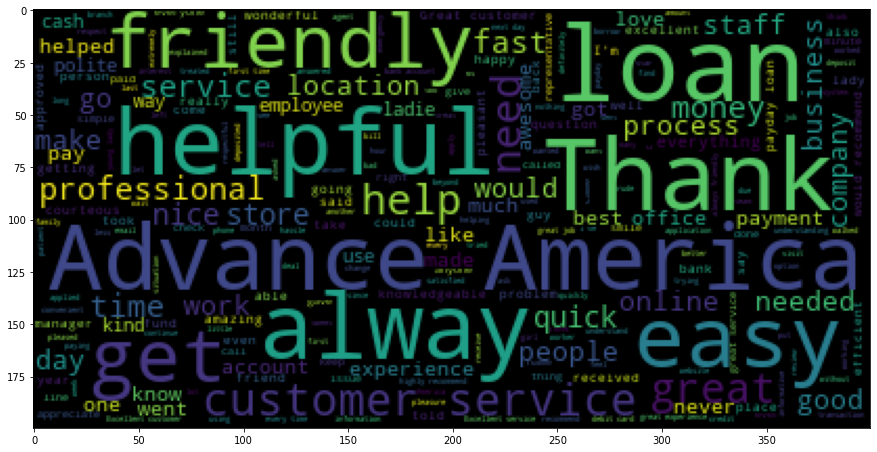

In [190]:
from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=300, stopwords=stop_words, max_font_size=50, random_state=42)

"""Display the wordcloud"""

import matplotlib.pyplot as plt

# Generate and display the word cloud

plt.figure(figsize= (15,15)) # Figure initialization
wc.generate(text) # "Calculation" from the wordcloud
plt.imshow(wc) # Display
plt.show()

In [191]:
tokens = []
def stop_words_filtering(words):
    
    for word in words:
        if word not in stop_words:
            tokens.append(word)
    return tokens


print(stop_words_filtering(words))

['I', 'using', 'Advance', 'America', 'years', '.', 'It', 'great', 'Way', 'get', 'extra', 'things', 'needed', 'deposit', 'due', 'For', 'something', 'unexpected', 'expenses', '.', 'The', 'website', 'user-friendly', 'convenient', '.', 'I', 'continue', 'loyal', 'user', 'I', 'highly', 'recommend', 'company', 'Or', 'cash', 'advances', 'others', 'I', 'used', 'past.I', 'originally', 'gone', 'Hoover', 'Homewood', 'talked', 'smart', 'asked', 'tones', 'called', 'rude', 'asking', 'questions', 'trying', 'figure', '.', 'Moe', 'Ce', 'terpoint', 'handled', 'concerns', 'loan', 'professionally', 'promptly.I', 'call', 'ahead', 'talk', 'manager', 'Rochelle', 'Haliburton', 'I', 'need', 'document', 'update', 'account', '.', 'Rochelle', 'kind', 'patient', 'able', 'update', 'old', 'account', 'another', 'location', 'Lexington', '.', 'Rather', 'get', 'cash', 'advance', 'VISA', 'Card', 'I', 'choose', 'Advance', 'America.The', 'girls', 'working', 'extremely', 'helpful', 'worked', 'around', 'personal', 'financial'

In [192]:
print(len(tokens))

206897


In [193]:
train_data=dataset['reviews']
y_target=dataset['stars'].map({1:'Unhappy',2:'Unhappy',3:'Happy',4:'Happy',5:'Happy'})

In [194]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y_target, test_size=0.2)

In [195]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

In [196]:
clf = GradientBoostingClassifier(
    n_estimators=100, random_state=44
).fit(X_train, y_train)

y_pred = clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [197]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Happy       0.94      0.98      0.96      2138
     Unhappy       0.49      0.21      0.29       170

    accuracy                           0.93      2308
   macro avg       0.72      0.59      0.63      2308
weighted avg       0.91      0.93      0.91      2308



In [198]:
print("Accuracy Train: {}".format(accuracy_score(y_test,y_pred )))


Accuracy Train: 0.9259098786828422


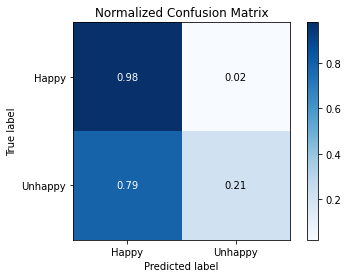

In [199]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


In [200]:

confusion_matrix = pd.crosstab(
    y_test, y_pred, rownames=["Real Class"], colnames=["Predicted Class"]
)
confusion_matrix

Predicted Class  Happy  Unhappy
Real Class                     
Happy             2102       36
Unhappy            135       35